# Strategic Ambiguity Data Exploration with xarray

This notebook provides a complete tutorial on exploring your strategic ambiguity empirics data using xarray.

## What is xarray?

xarray is a powerful library for working with labeled multi-dimensional arrays. It brings the power of pandas to multi-dimensional data.

**Key concepts:**
- **Dataset**: Container for multiple DataArrays with shared dimensions
- **DataArray**: Single variable with labeled dimensions and coordinates
- **Dimensions**: Names for axes (e.g., 'company', 'deal', 'observation')
- **Coordinates**: Labels along dimensions (e.g., company IDs)
- **Attributes**: Metadata about the dataset

**Why use xarray for this project?**
- Store all data (company, deals, panel) in one file
- Track provenance with git metadata in attributes
- Query data efficiently with labeled indexing
- Convert to pandas DataFrame when needed
- Reproducible: checkpoint file includes all processing steps

## Setup

In [4]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from pathlib import Path

# Set up plotting
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Add code directory to path to import pipeline
import sys
sys.path.insert(0, str(Path.cwd()))

print("✅ Setup complete")

✅ Setup complete


## 1. Loading the Data

After running the pipeline, data is saved as a pickle file. Let's load it.

In [5]:
# Load the checkpoint file
checkpoint_file = Path('../output/pipeline_checkpoint.pkl')

if checkpoint_file.exists():
    with open(checkpoint_file, 'rb') as f:
        ds = pickle.load(f)
    print(f"✅ Loaded dataset from {checkpoint_file}")
    print(f"\nDataset overview:")
    print(ds)
else:
    print(f"❌ Checkpoint file not found at {checkpoint_file}")
    print("💡 Run the pipeline first: python pipeline_xarray.py")

✅ Loaded dataset from ../output/pipeline_checkpoint.pkl

Dataset overview:
<xarray.Dataset> Size: 98MB
Dimensions:                        (company: 1320702, deal: 29715)
Coordinates:
  * company                        (company) object 11MB '100000-90' ... '999...
  * deal                           (deal) int64 238kB 0 1 2 ... 29713 29714
Data variables: (12/18)
    company_company_name           (company) object 11MB 'JB Education (Prima...
    company_description            (company) object 11MB 'Provider of educati...
    company_keywords               (company) object 11MB 'educational trainin...
    company_vagueness              (company) int64 11MB 50 50 50 50 ... 50 50 60
    company_high_integration_cost  (company) int64 11MB 0 0 0 0 0 ... 0 0 0 0 0
    company_total_raised           (company) float64 11MB 0.0 0.0 ... 1.8 0.25
    ...                             ...
    deal_vc_round                  (deal) object 238kB 'Series A' ... 'Series A'
    deal_deal_date              

## 2. Understanding Dimensions

Dimensions are the axes of your data. Think of them as the rows in a pandas DataFrame index.

In [6]:
# View dimensions
print("📊 Dimensions:")
print(ds.dims)
print()

if 'company' in ds.dims:
    print(f"   company: {ds.dims['company']} AI/ML firms")
if 'deal' in ds.dims:
    print(f"   deal: {ds.dims['deal']} Series A/B deals")
if 'observation' in ds.dims:
    print(f"   observation: {ds.dims['observation']} panel observations")

📊 Dimensions:
FrozenMappingWarningOnValuesAccess({'company': 1320702, 'deal': 29715})

   company: 1320702 AI/ML firms
   deal: 29715 Series A/B deals


/var/folders/9z/bf6qfjvd695cjkj7s4ss1cxh0000gn/T/ipykernel_40043/3875753128.py:7: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  print(f"   company: {ds.dims['company']} AI/ML firms")
/var/folders/9z/bf6qfjvd695cjkj7s4ss1cxh0000gn/T/ipykernel_40043/3875753128.py:9: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  print(f"   deal: {ds.dims['deal']} Series A/B deals")


## 3. Exploring Coordinates

Coordinates are the labels along each dimension. They allow you to select data by meaningful labels instead of integer indices.

In [7]:
# View coordinates
print("🏷️ Coordinates:")
print()

if 'company' in ds.coords:
    company_ids = ds.coords['company'].values
    print(f"Company IDs (first 5): {company_ids[:5]}")
    print()

if 'deal' in ds.coords:
    deal_ids = ds.coords['deal'].values
    print(f"Deal IDs (first 5): {deal_ids[:5]}")
    print()

if 'observation' in ds.coords:
    obs_ids = ds.coords['observation'].values
    print(f"Observation IDs (first 5): {obs_ids[:5]}")

🏷️ Coordinates:

Company IDs (first 5): ['100000-90' '1000006-93' '100001-08' '100001-71' '100002-07']

Deal IDs (first 5): [0 1 2 3 4]



## 4. Data Variables

Data variables are the actual measurements stored in the dataset. Our pipeline stores:
- `company_*`: Company-level variables (vagueness, integration cost, etc.)
- `deal_*`: Deal-level variables (deal size, funding success, etc.)
- `panel_*`: Analysis panel (merged company + deal data)

In [8]:
# List all data variables
print("📈 Data Variables:")
print()

company_vars = [v for v in ds.data_vars if v.startswith('company_')]
print(f"Company variables ({len(company_vars)}):")
for v in company_vars[:10]:  # Show first 10
    print(f"   - {v}")
if len(company_vars) > 10:
    print(f"   ... and {len(company_vars) - 10} more")
print()

deal_vars = [v for v in ds.data_vars if v.startswith('deal_')]
print(f"Deal variables ({len(deal_vars)}):")
for v in deal_vars[:10]:
    print(f"   - {v}")
if len(deal_vars) > 10:
    print(f"   ... and {len(deal_vars) - 10} more")
print()

panel_vars = [v for v in ds.data_vars if v.startswith('panel_')]
print(f"Panel variables ({len(panel_vars)}):")
for v in panel_vars[:10]:
    print(f"   - {v}")
if len(panel_vars) > 10:
    print(f"   ... and {len(panel_vars) - 10} more")

📈 Data Variables:

Company variables (8):
   - company_company_name
   - company_description
   - company_keywords
   - company_vagueness
   - company_high_integration_cost
   - company_total_raised
   - company_employees
   - company_year_founded

Deal variables (10):
   - deal_company_id
   - deal_company_name
   - deal_round
   - deal_deal_type
   - deal_vc_round
   - deal_deal_date
   - deal_deal_size
   - deal_funding_success
   - deal_investors
   - deal_post_valuation

Panel variables (0):


## 5. Accessing Data

There are several ways to access data in xarray:
- **Direct access**: `ds.variable_name` or `ds['variable_name']`
- **Selection**: `ds.variable_name.sel(dimension=value)`
- **Filtering**: `ds.where(condition, drop=True)`
- **To pandas**: `ds.to_dataframe()` or `ds.variable_name.to_pandas()`

In [14]:
# Dummy Data Generation for Testing
import pandas as pd
import numpy as np

np.random.seed(42)
n_firms = 75

# Create panel: each firm has Series A and B
data = []
for firm_id in range(n_firms):
    vagueness = np.random.uniform(35, 75)
    employees = np.random.randint(10, 200)
    integration = np.random.choice([0, 1], p=[0.7, 0.3])
    
    # Series A
    amount_A = np.random.lognormal(15.5, 0.5)  # ~$5M
    amount_A *= (1 - 0.3 * (vagueness - 50) / 50)  # Vague → less at A
    
    data.append({
        'company_id': f'firm_{firm_id:03d}',
        'series': 'A',
        'vagueness': vagueness,
        'deal_size': amount_A,
        'employees': employees,
        'high_integration_cost': integration
    })
    
    # Series B
    got_B = np.random.random() > 0.4
    amount_B = np.random.lognormal(16.5, 0.7) if got_B else 0
    if got_B:
        amount_B *= (1 + 0.4 * (vagueness - 50) / 50)  # Vague → more at B
    
    data.append({
        'company_id': f'firm_{firm_id:03d}',
        'series': 'B',
        'vagueness': vagueness,
        'deal_size': amount_B,
        'employees': employees + np.random.randint(0, 50),
        'high_integration_cost': integration
    })

df = pd.DataFrame(data)

# Prepare for analysis
df['log_amount'] = np.log(df['deal_size'] + 1)
df['funded'] = (df['deal_size'] > 0).astype(int)

print(f"Created {len(df)} observations ({n_firms} firms)")
print(f"\nSeries A: {(df['series']=='A').sum()}")
print(f"Series B: {(df['series']=='B').sum()} ({df['funded'].sum()} funded)")
print(f"\nVagueness: {df['vagueness'].mean():.1f} ± {df['vagueness'].std():.1f}")

Created 150 observations (75 firms)

Series A: 75
Series B: 75 (119 funded)

Vagueness: 53.5 ± 12.4


# 더미데이터로 플랏

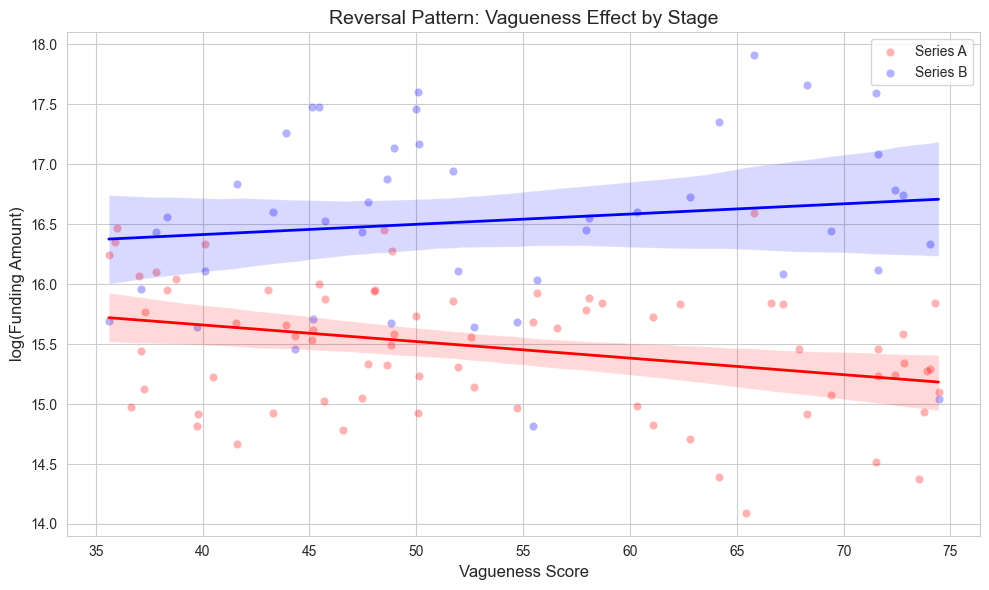

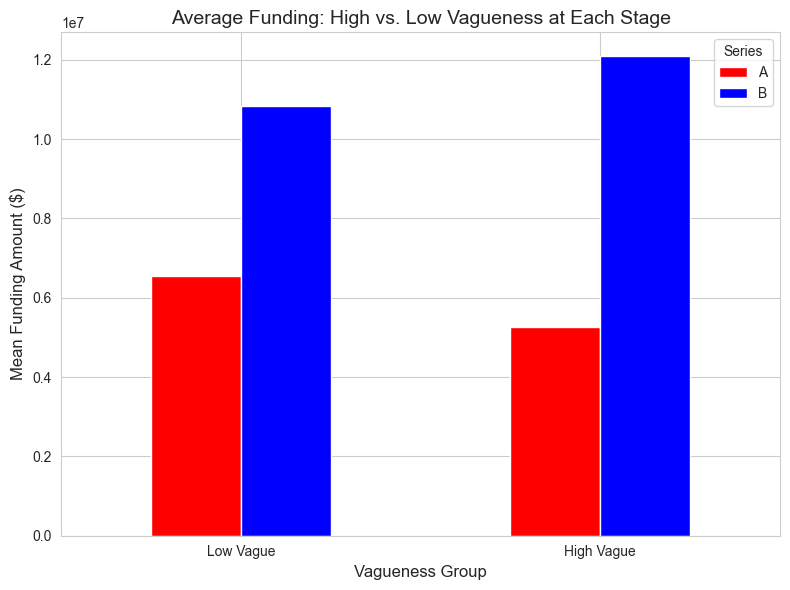

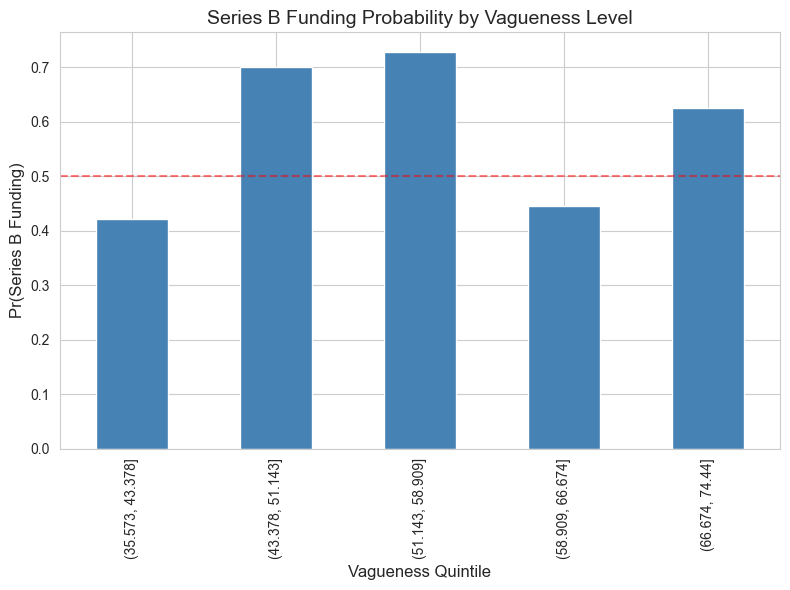

In [15]:
# ========== PLOT CODE FOR DUMMY DATA ==========
import matplotlib.pyplot as plt
import seaborn as sns

# Split by series
df_A = df[df['series'] == 'A'].copy()
df_B = df[df['series'] == 'B'].copy()

# Plot 1: Basic Reversal Check (친구 조언)
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=df_A, x='vagueness', y='log_amount', alpha=0.3, label='Series A', color='red', ax=ax)
sns.scatterplot(data=df_B[df_B['funded']==1], x='vagueness', y='log_amount', alpha=0.3, label='Series B', color='blue', ax=ax)
sns.regplot(data=df_A, x='vagueness', y='log_amount', scatter=False, color='red', line_kws={'linewidth': 2}, ax=ax)
sns.regplot(data=df_B[df_B['funded']==1], x='vagueness', y='log_amount', scatter=False, color='blue', line_kws={'linewidth': 2}, ax=ax)
ax.set_xlabel('Vagueness Score', fontsize=12)
ax.set_ylabel('log(Funding Amount)', fontsize=12)
ax.set_title('Reversal Pattern: Vagueness Effect by Stage', fontsize=14)
ax.legend()
plt.tight_layout()
plt.show()

# Plot 2: Median Split (친구 제안)
df['vague_group'] = pd.cut(df['vagueness'], bins=2, labels=['Low Vague', 'High Vague'])
grouped = df.groupby(['vague_group', 'series'])['deal_size'].mean()

fig, ax = plt.subplots(figsize=(8, 6))
grouped.unstack().plot(kind='bar', ax=ax, color=['red', 'blue'])
ax.set_xlabel('Vagueness Group', fontsize=12)
ax.set_ylabel('Mean Funding Amount ($)', fontsize=12)
ax.set_title('Average Funding: High vs. Low Vagueness at Each Stage', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.legend(title='Series')
plt.tight_layout()
plt.show()

# Plot 3: Funding Probability at B
prob_funded = df[df['series']=='B'].groupby(pd.cut(df['vagueness'], bins=5))['funded'].mean()

fig, ax = plt.subplots(figsize=(8, 6))
prob_funded.plot(kind='bar', ax=ax, color='steelblue')
ax.set_xlabel('Vagueness Quintile', fontsize=12)
ax.set_ylabel('Pr(Series B Funding)', fontsize=12)
ax.set_title('Series B Funding Probability by Vagueness Level', fontsize=14)
ax.axhline(y=0.5, color='red', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 실제 데이터 플랏

In [16]:
# ========== PLOT CODE FOR REAL DATA ==========
# Load real data (once pipeline completes)
from pathlib import Path

data_path = Path.cwd().parent / "data" / "processed" / "analysis_panel.csv"

if data_path.exists():
    df_real = pd.read_csv(data_path)
    
    # Prepare variables
    df_real['log_amount'] = np.log(df_real['deal_size'] + 1)
    df_real['funded'] = (df_real['deal_size'] > 0).astype(int)
    
    # Split
    df_A_real = df_real[df_real['series'] == 'A'].copy()
    df_B_real = df_real[df_real['series'] == 'B'].copy()
    
    # Same plots with real data
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.scatterplot(data=df_A_real, x='vagueness', y='log_amount', alpha=0.3, label='Series A', color='red')
    sns.scatterplot(data=df_B_real[df_B_real['funded']==1], x='vagueness', y='log_amount', alpha=0.3, label='Series B', color='blue')
    sns.regplot(data=df_A_real, x='vagueness', y='log_amount', scatter=False, color='red', line_kws={'linewidth': 2})
    sns.regplot(data=df_B_real[df_B_real['funded']==1], x='vagueness', y='log_amount', scatter=False, color='blue', line_kws={'linewidth': 2})
    ax.set_xlabel('Vagueness (LIWC: 100 - Certitude)')
    ax.set_ylabel('log(Deal Size)')
    ax.set_title('Real Data: Reversal Test')
    plt.tight_layout()
    plt.show()
    
    print(f"\nReal data loaded: {len(df_real)} observations")
    print(f"  Series A: {len(df_A_real)}, Series B: {len(df_B_real)}")
else:
    print(f"⚠️  Real data not found at {data_path}")
    print("Run pipeline first: python code/pipeline_xarray.py --from 1 --force")

⚠️  Real data not found at /Users/hyunjimoon/MIT Dropbox/Angie.H Moon/tolzul/Front/On/strategic ambiguity/empirics/data/processed/analysis_panel.csv
Run pipeline first: python code/pipeline_xarray.py --from 1 --force


In [9]:
# Example 1: Direct access to a variable
if 'company_vagueness' in ds:
    vagueness = ds.company_vagueness
    print("Example 1: Company Vagueness Scores")
    print(f"   Type: {type(vagueness)}")
    print(f"   Shape: {vagueness.shape}")
    print(f"   Mean: {vagueness.values.mean():.2f}")
    print(f"   Std: {vagueness.values.std():.2f}")
    print()

# Example 2: Access specific company
if 'company' in ds.coords:
    first_company_id = ds.coords['company'].values[0]
    print(f"Example 2: First Company (ID: {first_company_id})")
    if 'company_company_name' in ds:
        print(f"   Name: {ds.company_company_name.sel(company=first_company_id).values}")
    if 'company_vagueness' in ds:
        print(f"   Vagueness: {ds.company_vagueness.sel(company=first_company_id).values:.1f}")
    if 'company_high_integration_cost' in ds:
        cost = ds.company_high_integration_cost.sel(company=first_company_id).values
        print(f"   Integration Cost: {'High' if cost == 1 else 'Low'}")
    print()

# Example 3: Filter companies with high vagueness
if 'company_vagueness' in ds:
    high_vague = ds.where(ds.company_vagueness > 60, drop=True)
    print(f"Example 3: High Vagueness Companies (>60)")
    print(f"   Count: {high_vague.dims.get('company', 0)}")
    print()

Example 1: Company Vagueness Scores
   Type: <class 'xarray.core.dataarray.DataArray'>
   Shape: (1320702,)
   Mean: 52.97
   Std: 6.59

Example 2: First Company (ID: 100000-90)
   Name: ['JB Education (Primary & Secondary Schools)'
 'JB Education (Primary & Secondary Schools)'
 'JB Education (Primary & Secondary Schools)'
 'JB Education (Primary & Secondary Schools)'
 'JB Education (Primary & Secondary Schools)'
 'JB Education (Primary & Secondary Schools)']


TypeError: unsupported format string passed to numpy.ndarray.__format__

In [ ]:
# X축: Vagueness, Y축: Funding amount (log)
# 두 개의 선: Series A (빨강), Series B (파랑)
sns.scatterplot(data=df_A, x='vagueness', y='log_deal_size', alpha=0.3, label='Series A')
sns.scatterplot(data=df_B, x='vagueness', y='log_deal_size', alpha=0.3, label='Series B')
sns.regplot(data=df_A, x='vagueness', y='log_deal_size', scatter=False, color='red')
sns.regplot(data=df_B, x='vagueness', y='log_deal_size', scatter=False, color='blue')
# 만약 빨강선이 음의 기울기, 파랑선이 양의 기울기면 → reversal 존재

## 6. Attributes (Metadata)

Attributes store metadata about the dataset, including:
- Git commit information for reproducibility
- Pipeline execution timestamps
- Data summary statistics
- Date filtering ranges

In [10]:
# View important attributes
print("📝 Dataset Metadata:")
print()

important_attrs = [
    'pipeline_version',
    'created_at',
    'last_updated',
    'last_completed_step',
    'git_commit_url',
    'git_branch',
    'series_a_date_range',
    'series_b_date_range',
    'n_companies',
    'n_deals',
    'n_observations'
]

for attr in important_attrs:
    if attr in ds.attrs:
        value = ds.attrs[attr]
        print(f"   {attr}: {value}")

📝 Dataset Metadata:

   pipeline_version: 3.0_modular_xarray
   created_at: 2025-10-22T20:36:44.536336
   last_updated: 2025-10-22T20:45:08.511757
   last_completed_step: 02_process_deal
   git_commit_url: https://github.com/hyunjimoon/tolzul/commit/2fd1818ea4bc7362cd30ab457160d729fd98ce20
   git_branch: master
   series_a_date_range: 2021-01-01 to 2022-10-31
   series_b_date_range: 2023-05-01 to 2025-10-31
   n_companies: 1320702
   n_deals: 29715


## 7. Converting to pandas DataFrame

For analysis tasks, you might want to work with familiar pandas DataFrames.

In [11]:
# Convert panel data to DataFrame
if any(v.startswith('panel_') for v in ds.data_vars):
    panel_cols = [v.replace('panel_', '') for v in ds.data_vars if v.startswith('panel_')]
    panel_data = {col: ds[f'panel_{col}'].values for col in panel_cols}
    panel_df = pd.DataFrame(panel_data)
    
    print("📊 Panel DataFrame:")
    print(f"   Shape: {panel_df.shape}")
    print()
    print("First 5 rows:")
    display(panel_df.head())
else:
    print("No panel data found. Run the pipeline first.")

No panel data found. Run the pipeline first.


## 8. Query Patterns

Common query patterns for analysis:
- `ds.where()`: Filter based on conditions
- `ds.sel()`: Select specific coordinates
- `ds.isel()`: Select by integer index
- Arithmetic operations work element-wise

In [12]:
# Query Pattern 1: Filter panel by round
if 'panel_round' in ds:
    # Get Series A observations
    series_a_mask = ds.panel_round.values == 'Series A'
    print(f"Query 1: Series A observations")
    print(f"   Count: {series_a_mask.sum()}")
    
    if 'panel_funding_success' in ds:
        series_a_success = ds.panel_funding_success.values[series_a_mask]
        print(f"   Success rate: {series_a_success.mean():.1%}")
    print()

# Query Pattern 2: Compare success rates by round
if 'panel_round' in ds and 'panel_funding_success' in ds:
    rounds = ds.panel_round.values
    success = ds.panel_funding_success.values
    
    print("Query 2: Success rates by round")
    for round_name in ['Series A', 'Series B']:
        mask = rounds == round_name
        if mask.sum() > 0:
            rate = success[mask].mean()
            print(f"   {round_name}: {rate:.1%} ({mask.sum()} observations)")
    print()

# Query Pattern 3: Vagueness by integration cost
if 'panel_vagueness' in ds and 'panel_high_integration_cost' in ds:
    vagueness = ds.panel_vagueness.values
    high_i = ds.panel_high_integration_cost.values
    
    print("Query 3: Average vagueness by integration cost")
    print(f"   High integration cost: {vagueness[high_i == 1].mean():.1f}")
    print(f"   Low integration cost: {vagueness[high_i == 0].mean():.1f}")

## 9. Analysis Workflow Example

Let's analyze the key hypothesis: Does vagueness have opposite effects on Series A vs B funding?

In [ ]:
if all(v in ds for v in ['panel_vagueness', 'panel_round', 'panel_funding_success']):
    # Create analysis DataFrame
    df = pd.DataFrame({
        'vagueness': ds.panel_vagueness.values,
        'round': ds.panel_round.values,
        'success': ds.panel_funding_success.values
    })
    
    # Create vagueness categories
    df['vagueness_category'] = pd.cut(
        df['vagueness'],
        bins=[0, 50, 100],
        labels=['Precise', 'Vague']
    )
    
    # Calculate success rates
    success_rates = df.groupby(['vagueness_category', 'round'])['success'].agg(['mean', 'count'])
    success_rates.columns = ['Success Rate', 'N']
    
    print("🎯 Hypothesis Test: Vagueness Reversal Pattern")
    print()
    print(success_rates)
    print()
    
    # Visualize
    success_pivot = success_rates['Success Rate'].unstack()
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    x = np.arange(len(success_pivot.index))
    width = 0.35
    
    ax.bar(x - width/2, success_pivot['Series A'], width, 
           label='Series A', color='steelblue', alpha=0.8)
    ax.bar(x + width/2, success_pivot['Series B'], width, 
           label='Series B', color='coral', alpha=0.8)
    
    ax.set_xlabel('Promise Type', fontsize=12, fontweight='bold')
    ax.set_ylabel('Funding Success Rate', fontsize=12, fontweight='bold')
    ax.set_title('Strategic Ambiguity: Reversal Pattern', fontsize=14, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(success_pivot.index)
    ax.legend()
    ax.set_ylim(0, 1.1)
    ax.grid(axis='y', alpha=0.3)
    
    # Add value labels
    for i, cat in enumerate(success_pivot.index):
        for j, round_name in enumerate(['Series A', 'Series B']):
            value = success_pivot.loc[cat, round_name]
            x_pos = i + (j - 0.5) * width
            ax.text(x_pos, value, f'{value:.1%}', 
                   ha='center', va='bottom', fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
    # Interpretation
    print("\n📈 Interpretation:")
    if len(success_pivot.index) >= 2:
        precise_a = success_pivot.loc['Precise', 'Series A']
        vague_a = success_pivot.loc['Vague', 'Series A']
        precise_b = success_pivot.loc['Precise', 'Series B']
        vague_b = success_pivot.loc['Vague', 'Series B']
        
        if precise_a > vague_a and vague_b > precise_b:
            print("   ✅ REVERSAL PATTERN CONFIRMED!")
            print(f"   - Series A: Precise ({precise_a:.1%}) > Vague ({vague_a:.1%})")
            print(f"   - Series B: Vague ({vague_b:.1%}) > Precise ({precise_b:.1%})")
        else:
            print("   Pattern not as expected. Further investigation needed.")
else:
    print("Panel data not available. Run the pipeline first.")

## 10. Advanced: Three-Way Interaction

Explore how the reversal pattern varies by integration cost.

In [ ]:
required_vars = ['panel_vagueness', 'panel_round', 'panel_funding_success', 'panel_high_integration_cost']

if all(v in ds for v in required_vars):
    # Create analysis DataFrame
    df = pd.DataFrame({
        'vagueness': ds.panel_vagueness.values,
        'round': ds.panel_round.values,
        'success': ds.panel_funding_success.values,
        'high_i': ds.panel_high_integration_cost.values
    })
    
    df['vagueness_category'] = pd.cut(df['vagueness'], bins=[0, 50, 100], labels=['Precise', 'Vague'])
    df['integration_cost'] = df['high_i'].map({0: 'Low-i (API/SaaS)', 1: 'High-i (Hardware)'})
    
    # Calculate success rates
    success_3way = df.groupby(['integration_cost', 'vagueness_category', 'round'])['success'].mean()
    
    print("🎯 Three-Way Interaction: Vagueness × Round × Integration Cost")
    print()
    print(success_3way.unstack())
    print()
    
    # Visualize
    fig, ax = plt.subplots(figsize=(12, 7))
    
    colors = {
        ('High-i (Hardware)', 'Precise'): '#d62728',
        ('High-i (Hardware)', 'Vague'): '#ff7f0e',
        ('Low-i (API/SaaS)', 'Precise'): '#1f77b4',
        ('Low-i (API/SaaS)', 'Vague'): '#2ca02c'
    }
    
    for int_cost in df['integration_cost'].unique():
        for vague in ['Precise', 'Vague']:
            subset = df[(df['integration_cost'] == int_cost) & (df['vagueness_category'] == vague)]
            
            if len(subset) > 0:
                rates = subset.groupby('round')['success'].mean()
                
                x_vals = [0 if r == 'Series A' else 1 for r in rates.index]
                y_vals = rates.values
                
                label = f"{int_cost}, {vague}"
                color = colors.get((int_cost, vague), 'gray')
                marker = 'o' if vague == 'Precise' else 's'
                linestyle = '-' if vague == 'Precise' else '--'
                
                ax.plot(x_vals, y_vals, marker=marker, linewidth=2.5, markersize=10,
                       label=label, color=color, linestyle=linestyle, alpha=0.85)
    
    ax.set_xlabel('Funding Round', fontsize=13, fontweight='bold')
    ax.set_ylabel('Funding Success Rate', fontsize=13, fontweight='bold')
    ax.set_title('Three-Way Interaction: Vagueness × Round × Integration Cost', 
                fontsize=14, fontweight='bold')
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['Series A', 'Series B'])
    ax.legend(fontsize=10, loc='best')
    ax.grid(alpha=0.3)
    ax.set_ylim(0, 1.15)
    
    plt.tight_layout()
    plt.show()
else:
    print("Required variables not found. Run the pipeline first.")

## 11. Saving Your Work

Export to various formats for further analysis or sharing.

In [ ]:
# Export panel data to CSV
if any(v.startswith('panel_') for v in ds.data_vars):
    panel_cols = [v.replace('panel_', '') for v in ds.data_vars if v.startswith('panel_')]
    panel_data = {col: ds[f'panel_{col}'].values for col in panel_cols}
    panel_df = pd.DataFrame(panel_data)
    
    output_file = '../output/panel_export.csv'
    panel_df.to_csv(output_file, index=False)
    print(f"✅ Exported panel data to {output_file}")
    print(f"   Shape: {panel_df.shape}")
    print(f"   Size: {Path(output_file).stat().st_size / 1024:.1f} KB")

## 12. Summary

### Key xarray Concepts Learned

1. **Dataset**: Container holding multiple related DataArrays
2. **Dimensions**: Named axes (company, deal, observation)
3. **Coordinates**: Labels along dimensions (company IDs, deal IDs)
4. **Data Variables**: Actual measurements (vagueness, funding_success, etc.)
5. **Attributes**: Metadata (git info, timestamps, data summaries)

### Common Operations

```python
# Access variable
ds.company_vagueness

# Select by coordinate
ds.company_vagueness.sel(company='500001-01')

# Filter by condition
ds.where(ds.company_vagueness > 60, drop=True)

# Convert to pandas
ds.to_dataframe()

# Access values as numpy array
ds.company_vagueness.values
```

### Pipeline Workflow

1. **Process company data** → `company_*` variables
2. **Process deal data** → `deal_*` variables  
3. **Create panel** → `panel_*` variables (merged)
4. **Run analysis** → regression results
5. **Create deliverables** → tables and figures

### Next Steps

- Explore additional visualizations
- Run robustness checks
- Export results for paper
- Share checkpoint file for reproducibility